In [1]:
import torch
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from pathlib import Path

## Problem: 
Generate 1000 samples. 500 circles and 500 square using opencv. Shape: 28, 28, 1
Create a Model. CNN2d(32), CNN2d(64), Linear(128), Linear(2)
activation: relu
Bonus: Create squares and circles with different shapes

### Creating local directory to store dataset
    dataset/ <- overall dataset folder
        train/ <- training images
            circle/ <- class names as folders
                image01.png
                image02.png
                ...
            square/
                imagexx.png
                ....
        test/ <- testing images
            circle/ <- class names as folders
                imagexx.png
                imagexx.png
                ...
            square/
                imagexx.png
                ....

In [2]:
over_dir = Path('dataset')
train_dir = over_dir /'train'
test_dir = over_dir /'test'
classes_names = ['circle', 'square']
if os.path.isdir(train_dir) == False:
    os.makedirs(train_dir)
if os.path.isdir(test_dir) == False:
    os.makedirs(test_dir)
for i in classes_names:
    dir_path_train = train_dir / i
    dir_path_test = test_dir / i
    if os.path.isdir(dir_path_train) == False:
        os.makedirs(dir_path_train)
    if os.path.isdir(dir_path_test) == False:
        os.makedirs(dir_path_test)

## Generating images and saving to the cteated paths

In [3]:

random.seed(42)


for i in range(450):
    # Create a 28*28 numpy array
    arr = np.zeros((1,28, 28))

    # Create circles with different radius 
    rr, cc = np.ogrid[:28, :28]
    circle = (rr - 13) ** 2 + (cc - 13) ** 2 < random.randint(5,10) ** 2
    circle = np.array(circle, np.uint8)
    path_to_save = str(train_dir / f'circle/circle{i}.jpg')
    cv2.imwrite(path_to_save, circle*255)
    
    # Create squares with different side length 
    square = np.zeros((28, 28))
    a1 = random.randint(3,10)
    a2 = random.randint(13,20)
    square[a1:a2, a1:a2] = 1
    square = np.array(square, np.uint8)
    path_to_save = str(train_dir / f'square/square{i}.jpg')
    cv2.imwrite(path_to_save, square*255)
    
for i in range(450,500):
    # Create a 28*28 numpy array
    arr = np.zeros((1,28, 28))

    # Create circles with different radius 
    rr, cc = np.ogrid[:28, :28]
    circle = (rr - 13) ** 2 + (cc - 13) ** 2 < random.randint(5,10) ** 2
    circle = np.array(circle, np.uint8)
    path_to_save = str(test_dir / f'circle/circle{i}.jpg')
    cv2.imwrite(path_to_save, circle*255)
    
    # Create squares with different side length 
    square = np.zeros((28, 28))
    a1 = random.randint(3,10)
    a2 = random.randint(13,20)
    square[a1:a2, a1:a2] = 1
    square = np.array(square, np.uint8)
    path_to_save = str(test_dir / f'square/square{i}.jpg')
    cv2.imwrite(path_to_save, square*255)



In [4]:
# Setup path to data folder
data_path = Path("dataset/")
import os

def walk_through_data(dir_path):
    """A simple function to walk through the dataset"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_data(data_path)

There are 2 directories and 0 images in 'dataset'
There are 2 directories and 0 images in 'dataset\test'
There are 0 directories and 50 images in 'dataset\test\circle'
There are 0 directories and 50 images in 'dataset\test\square'
There are 2 directories and 0 images in 'dataset\train'
There are 0 directories and 450 images in 'dataset\train\circle'
There are 0 directories and 450 images in 'dataset\train\square'


In [5]:
train_dir = data_path / "train"
test_dir = data_path / "test"
train_dir, test_dir

(WindowsPath('dataset/train'), WindowsPath('dataset/test'))

### Displaying some data samples

In [6]:
from PIL import Image

#random.seed(42)

image_path_list = list(data_path.glob("*/*/*.jpg"))
#print(image_path_list)
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

square
Random image path: dataset\train\square\square89.jpg
Image class: square
Image height: 28
Image width: 28


(-0.5, 27.5, 27.5, -0.5)

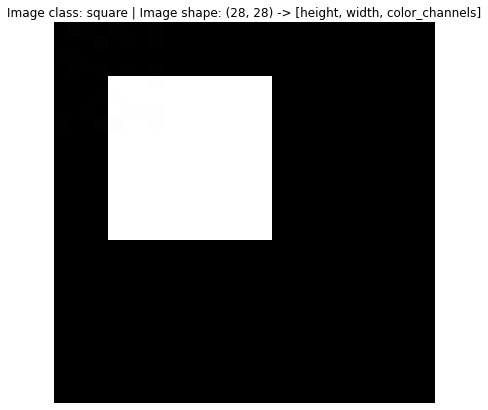

In [7]:
np_img = np.array(img)
plt.figure(figsize=(10,7))
plt.imshow(np_img, cmap='gray')
plt.title(f"Image class: {image_class} | Image shape: {np_img.shape} -> [height, width, color_channels]")
plt.axis(False)

## Loading data using built-in function of PyTorch

In [8]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
# Creating a data transformer to resize and adopt the parameter for feeding the model
data_transform = transforms.Compose([
    #resize our images
    transforms.Resize(size=(28,28)),
    #flip the images randomly
    transforms.Grayscale(num_output_channels=1),
    #transforms.RandomHorizontalFlip(p=0.5),
    transforms.transforms.ToTensor()

])

In [10]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 900
     Root location: dataset\train
     StandardTransform
 Transform: Compose(
                Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
                Grayscale(num_output_channels=1)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 100
     Root location: dataset\test
     StandardTransform
 Transform: Compose(
                Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
                Grayscale(num_output_channels=1)
                ToTensor()
            ))

In [11]:
class_names = train_data.classes
class_names

['circle', 'square']

In [12]:
class_dict = train_data.class_to_idx
class_dict

{'circle': 0, 'square': 1}

In [13]:
len(train_data), len(test_data)

(900, 100)

In [14]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0000, 0.0000, 0.0078, 0.0039, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0157, 0.0000, 0.0078, 0.0000, 0.0000, 0.0078, 0.0000,
          0.0000, 0.0078, 0.0039, 0.0000, 0.0078, 0.0000, 0.0039, 0.0000,
          0.0039, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0078, 0.0039,
          0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0078, 0.0000, 0.0118,
          0.0000, 0.0157, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0157, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0

(-0.5, 27.5, 27.5, -0.5)

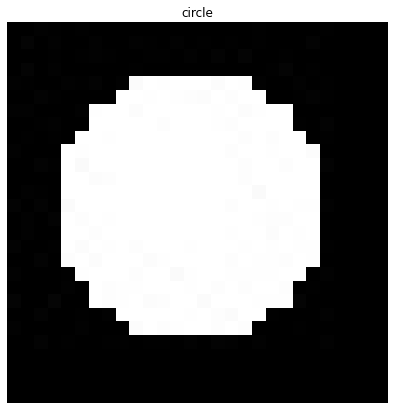

In [15]:
img_permute = img.permute(1,2,0)
plt.figure(figsize=(10,7))
plt.imshow(img_permute, cmap="gray")
plt.title(f"{class_names[label]}")
plt.axis(False)

In [16]:
import os
os.cpu_count()

4

### Creating dataloader with specific batch size to feed the Model

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 8
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE,
                             num_workers=2, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE,
                             num_workers=2, shuffle=False)

In [18]:
len(train_dataloader), len(test_dataloader)

(113, 13)

In [19]:
img,label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

## Create a Model. CNN2d(32), CNN2d(64),Linear(128), Linear(2)

In [20]:
from torch import nn
class Model_class(nn.Module):
    def __init__(self, input_shape:int, hidden_unit_layer1:int,hidden_unit_layer2:int,output_shape:int):
        super().__init__()
        self.convblock1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_unit_layer1,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit_layer1,
                     out_channels=hidden_unit_layer1,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(hidden_unit_layer1,
                     hidden_unit_layer2,
                     3,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(hidden_unit_layer2,
                     hidden_unit_layer2,
                     3,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit_layer2*4*4,
                      out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,
                      out_features=2)
        )
    def forward(self, x:torch.Tensor):
        x = self.convblock1(x)
        #print(x.shape)
        x = self.convblock2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [21]:
# Creating the Model from the created class
model_0 = Model_class(input_shape=1,hidden_unit_layer1=32, hidden_unit_layer2=64, output_shape=2)


In [23]:
#testing if the model accept the created data by passing one batch
with torch.inference_mode():
    y = model_0(img)
y

tensor([[0.0531, 0.0135],
        [0.0551, 0.0136],
        [0.0536, 0.0117],
        [0.0563, 0.0189],
        [0.0529, 0.0112],
        [0.0551, 0.0136],
        [0.0561, 0.0171],
        [0.0544, 0.0165]])

In [24]:
#setup optimizer and loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [25]:
#defining functions for train and test steps
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    print(f"train loss: {train_loss} | train acc: {train_acc}")
    return train_loss, train_acc

In [26]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    print(f"test loss: {test_loss} | test acc: {test_acc}")
    return test_loss, test_acc

In [28]:
from tqdm.auto import tqdm
torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
# Train and test model 
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(dataloader=train_dataloader, 
        model=model_0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_step(dataloader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,
    )



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
train loss: 0.6818095461457176 | train acc: 0.577433628318584
test loss: 0.6405899387139541 | test acc: 0.5192307692307693
Epoch: 1
---------
train loss: 0.48962236096901174 | train acc: 0.7621681415929203
test loss: 0.3045770333936581 | test acc: 0.9230769230769231
Epoch: 2
---------
train loss: 0.36684452981347854 | train acc: 0.838495575221239
test loss: 0.37622472643852234 | test acc: 0.8173076923076923
Epoch: 3
---------
train loss: 0.19656424055007837 | train acc: 0.918141592920354
test loss: 0.007095848022100444 | test acc: 1.0
Epoch: 4
---------
train loss: 0.002642973824855547 | train acc: 1.0
test loss: 0.0007832405346842 | test acc: 1.0


### Make prediction and create a confusion matrix

In [29]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [30]:
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 1 (square)


In [31]:
pred_probs= make_predictions(model=model_0, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7198e-11, 1.0000e+00],
        [9.9998e-01, 2.1943e-05]])

In [32]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 0, 0, 1, 0, 0, 0, 0, 0])

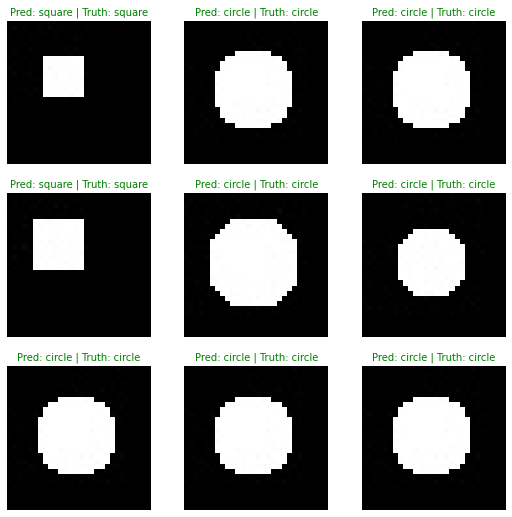

In [33]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]] 

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

      # Check for equality and change title colour accordingly
    if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False);

In [36]:
# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/13 [00:00<?, ?it/s]

<Figure size 720x720 with 0 Axes>

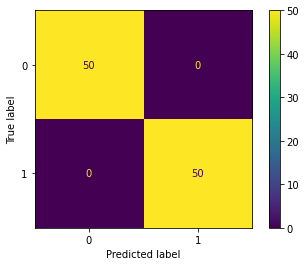

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(torch.Tensor(test_data.targets),
                           y_pred_tensor)

ConfusionMatrixDisplay(conf_mat).plot()


array([[50,  0],
       [ 0, 50]], dtype=int64)